In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from KPIs import *
from matplotlib import rc
import seaborn as sns
from canon_specific_analysis import *

In [126]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 10
sns.set_theme()
sns.set_style("whitegrid")
colorblind_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [127]:
path = 'C:/Users/micha/Documents/Studium/BA_Oldenburg/Semester_Letztes/BA/ba_krah_michael'
car = pd.read_csv(path + '/results/EXP1_canon_allocation_results.csv', index_col=[0,1])
ar_bl = pd.read_csv(path + '/results/BL_allocation_results.csv', index_col=[1,2])
exp2_car = pd.read_csv(path + '/results/EXP2_canon_allocation_results.csv', index_col=[0,1])

Add shares of demand for baseline and experiment 2 (where canon-specific allocations will be the same, as they are independent of the voting procedure)

In [128]:
car.rename(columns={'share_of_demand': 'exp1_sod'}, inplace=True)
car['bl_sod'] = ar_bl['share_of_demand']
car['exp2_sod'] = exp2_car['share_of_demand']
display(car.head(10))

demand  contribution  allocation  exp1_sod  sod_effort  \
time agent                                                             
54.0 0      0.001509           0.0    0.001189  0.788001         0.0   
     1      0.000176           0.0    0.000170  0.964418         0.0   
     2      0.009288           0.0    0.008555  0.921041         0.0   
     3      0.000740           0.0    0.000654  0.884232         0.0   
     4      0.001207           0.0    0.000887  0.735132         0.0   
     5      0.000367           0.0    0.000286  0.778757         0.0   
     6      0.018577           0.0    0.017474  0.940653         0.0   
     7      0.000441           0.0    0.000346  0.785571         0.0   
     8      0.000246           0.0    0.000203  0.825832         0.0   
     9      0.001398           0.0    0.000606  0.433194         0.0   

            sod_equality  sod_needs  sod_social_utility  sod_productivity  \
time agent                                                                  
54.0 0          0.829181   0.437207            1.000000               0.0   
     1          0.829181   1.000000            0.944602               0.0   
     2          0.829181   1.000000            0.819844               0.0   
     3          0.829181   0.755237            0.958739               0.0   
     4          0.829181   0.578686            0.706461               0.0   
     5          0.829181   0.712725            0.697892               0.0   
     6          0.829181   0.876252            1.000000               0.0   
     7          0.829181   0.755731            0.674485               0.0   
     8          0.829181   0.599934            0.946078               0.0   
     9          0.829181   0.416738            0.000000               0.0   

            sod_supply_and_demand     needs  social_utilities  bl_sod  \
time agent                                                              
54.0 0                        0.0  0.222898          0.664791     1.0   
     1                        0.0  0.539103          0.552977     1.0   
     2                        0.0  0.770762          0.479942     1.0   
     3                        0.0  0.385036          0.561253     1.0   
     4                        0.0  0.295027          0.413567     1.0   
     5                        0.0  0.363363          0.408551     1.0   
     6                        0.0  0.446733          0.705599     1.0   
     7                        0.0  0.385288          0.394848     1.0   
     8                        0.0  0.305860          0.553841     1.0   
     9                        0.0  0.212463          0.000000     1.0   

            exp2_sod  
time agent            
54.0 0      0.788001  
     1      0.964418  
     2      0.921041  
     3      0.884232  
     4      0.735132  
     5      0.778757  
     6      0.940653  
     7      0.785571  
     8      0.825832  
     9      0.433194

Add column for share of demand without voting, i.e., with equal weights for each canon

In [129]:
no_canons = 6
weight = 1 / no_canons
car['equal_weights_sod'] = weight * (car['sod_effort'] + car['sod_equality'] + car['sod_needs'] + car['sod_social_utility'] + car['sod_productivity'] + car['sod_supply_and_demand'])
max_sn_mva = 0.63
max_loading = 0.85
for time, group in car.groupby(level='time'):
    alpha = (max_sn_mva * max_loading) / np.sum(group['equal_weights_sod'] * group['demand'])
    sod = alpha * group['equal_weights_sod']
    car.loc[group.index, 'equal_weights_sod'] = sod
car['equal_weights_sod'] = car['equal_weights_sod'].clip(upper=1)

# Brief look at descriptive statistics for each canon

In [130]:
def compute_descriptive_statistics(df, column_name):
    stats = {
        'mean': df[column_name].mean(),
        'std': df[column_name].std(),
        '25%': df[column_name].quantile(0.25),
        '50% (median)': df[column_name].quantile(0.50),
        '75%': df[column_name].quantile(0.75),
        'min': df[column_name].min(),
        'max': df[column_name].max()
    }
    return stats

In [131]:
equality_stats = compute_descriptive_statistics(car, 'sod_equality')
print(f'Canon of equality: {equality_stats}')
needs_stats = compute_descriptive_statistics(car, 'sod_needs')
print(f'Canon of needs: {needs_stats}')
social_utility_stats = compute_descriptive_statistics(car, 'sod_social_utility')
print(f'Canon of social utility: {social_utility_stats}')
effort_stats = compute_descriptive_statistics(car, 'sod_effort')
print(f'Canon of effort: {effort_stats}')
productivity_stats = compute_descriptive_statistics(car, 'sod_productivity')
print(f'Canon of productivity: {productivity_stats}')
supply_and_demand_stats = compute_descriptive_statistics(car, 'sod_supply_and_demand')
print(f'Canon of supply and demand: {supply_and_demand_stats}')

Canon of equality: {'mean': 0.7786043930972694, 'std': 0.11364731970786812, '25%': 0.6994997952957617, '50% (median)': 0.7804732766364799, '75%': 0.8643965291913508, 'min': 0.4318014255381743, 'max': 1.0}
Canon of needs: {'mean': 0.8210095014025598, 'std': 0.24751317867144418, '25%': 0.6894606950991713, '50% (median)': 0.9776348181736388, '75%': 1.0, 'min': 0.0, 'max': 1.0}
Canon of social utility: {'mean': 0.7022708698366691, 'std': 0.2417222352888151, '25%': 0.5317873325934013, '50% (median)': 0.7237082305212483, '75%': 0.9210454231351155, 'min': 0.0, 'max': 1.0}
Canon of effort: {'mean': 0.7436966040814489, 'std': 0.14454932133330756, '25%': 0.6417736649931358, '50% (median)': 0.7453055382929193, '75%': 0.8491485361537348, 'min': 0.0, 'max': 1.0}
Canon of productivity: {'mean': 0.3197989173534428, 'std': 0.4567472145990392, '25%': 0.0, '50% (median)': 0.0, '75%': 1.0, 'min': 0.0, 'max': 1.0}
Canon of supply and demand: {'mean': 0.4237869390284209, 'std': 0.47166377852015395, '25%': 

# Theil's L for each canon

To make use of the decomposability of Theil's L, we need to partition agents into groups. For the history-based canons, we will define criteria based on the canons. Unlike the canons, they use data from the current time step, rather than all previous time steps. This makes sense, because we measure inequality at each point in time and assess the extent to which a distribution is just for each point in time

In [132]:
num_shifts = 5
car['effort_sum'] = 0
for shift in range(1, num_shifts + 1):
    shifted_demand = car.groupby('agent')['demand'].shift(shift)
    shifted_allocation = car.groupby('agent')['allocation'].shift(shift)
    car['effort_sum'] += shifted_demand / shifted_allocation
car = car.dropna(subset=['effort_sum'])
car['effort'] = car['effort_sum']
car['productivity'] = car['contribution'] / car['allocation']
car['supply_and_demand'] = 0.0
for time, group in car.groupby(level='time'):
    mean_contribution = group['contribution'].min()
    car.loc[group.index, 'supply_and_demand'] = (group['contribution'] + mean_contribution) / group['demand']
#car['effort'] = min_max_normalize(car['effort'])
#car['productivity'] = min_max_normalize(car['productivity'])
#car['supply_and_demand'] = min_max_normalize(car['supply_and_demand'])

In [133]:
display(car)

demand  contribution  allocation  exp1_sod  sod_effort  \
time    agent                                                             
72.0    0      0.003974           0.0    0.002571  0.647012    0.614881   
        1      0.000176           0.0    0.000138  0.784094    0.601223   
        2      0.001750           0.0    0.001134  0.647703    0.612270   
        3      0.004190           0.0    0.003098  0.739307    0.606043   
        4      0.003179           0.0    0.002003  0.630022    0.621763   
...                 ...           ...         ...       ...         ...   
35124.0 106    0.000168           0.0    0.000134  0.799442    1.000000   
        107    0.017521           0.0    0.015934  0.909395    0.969663   
        108    0.000046           0.0    0.000046  1.000000    0.889374   
        109    0.004490           0.0    0.004204  0.936270    1.000000   
        110    0.006331           0.0    0.006331  1.000000    0.887940   

               sod_equality  sod_needs  sod_social_utility  sod_productivity  \
time    agent                                                                  
72.0    0          0.642597   0.354240            0.906269      0.000000e+00   
        1          0.642597   0.856769            0.753839      0.000000e+00   
        2          0.642597   1.000000            0.654276      0.000000e+00   
        3          0.642597   0.611919            0.765121      0.000000e+00   
        4          0.642597   0.468871            0.563791      0.000000e+00   
...                     ...        ...                 ...               ...   
35124.0 106        0.957280   0.272746            0.298172      1.667777e-30   
        107        0.957280   0.766903            1.000000      0.000000e+00   
        108        0.957280   0.975894            0.777006      1.987679e-31   
        109        0.957280   0.614310            0.547453      0.000000e+00   
        110        0.957280   1.000000            1.000000      0.000000e+00   

               sod_supply_and_demand     needs  social_utilities  bl_sod  \
time    agent                                                              
72.0    0                   0.605544  0.222898          0.664791     1.0   
        1                   1.000000  0.539103          0.552977     1.0   
        2                   0.193398  0.770762          0.479942     1.0   
        3                   1.000000  0.385036          0.561253     1.0   
        4                   0.756930  0.295027          0.413567     1.0   
...                              ...       ...               ...     ...   
35124.0 106                 1.000000  0.118220          0.150574     1.0   
        107                 0.026986  0.332409          0.698427     1.0   
        108                 1.000000  0.422994          0.392382     1.0   
        109                 1.000000  0.266268          0.276459     1.0   
        110                 1.000000  0.649147          0.551329     1.0   

               exp2_sod  equal_weights_sod  effort_sum    effort  \
time    agent                                                      
72.0    0      0.648851           0.647546    5.515551  5.515551   
        1      0.783576           0.799070    5.057793  5.057793   
        2      0.659364           0.643194    5.260678  5.260678   
        3      0.735189           0.751647    5.229387  5.229387   
        4      0.624049           0.633121    5.704433  5.704433   
...                 ...                ...         ...       ...   
35124.0 106    0.777761           0.830658    7.577531  7.577531   
        107    0.916618           0.876011    6.405167  6.405167   
        108    1.000000           1.000000    6.016486  6.016486   
        109    0.920256           0.969763    7.499888  7.499888   
        110    1.000000           1.000000    5.912526  5.912526   

               productivity  supply_and_demand  
time    agent                                   
72.0    0               0.0 

In [134]:
car = car.drop(index=car.index.get_level_values('time').min(), level='time')

## Baseline

### Theil's L

In [135]:
bl_tl_results = []
quantile_columns = ['needs', 'social_utilities', 'effort', 'productivity', 'supply_and_demand']

for time, group in car.groupby(level='time'):
    # share of demand at time step
    full_distribution = group['bl_sod']
    
    # canon of equality
    theils_l_val = compute_theils_l(full_distribution)
    row = {
        'time': time,
        'canon': 'equality',
        'theils_l': theils_l_val
    }
    bl_tl_results.append(row)
    
    # quantiles at time step
    quantiles_per_canon = {}
    for col in quantile_columns:
        quantiles = pd.cut(group[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        group_wise_distributions = [
            group['bl_sod'][quantiles == q].values for q in quantiles.unique()
        ]
        theils_l_within, theils_l_between = theils_l_within_and_between(
            full_distribution, group_wise_distributions
        )
        row = {
            'time': time,
            'canon': col,
            'tl_between': theils_l_between
        }
        for i, group_theils_l in enumerate(theils_l_within):
            row[f'tl_within_Q{i + 1}'] = group_theils_l
        bl_tl_results.append(row)

bl_tl_results = pd.DataFrame(bl_tl_results)

In [136]:
display(bl_tl_results.head(18))

,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4
0,73.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
1,73.0,needs,NaN,0.000052,3.600723e-17,-7.001406e-17,0.000000,0.115362
2,73.0,social_utilities,NaN,0.000671,0.000000e+00,-8.801768e-17,0.000000,0.114743
3,73.0,effort,NaN,0.000170,-1.580317e-16,0.000000e+00,0.115244,0.000000
4,73.0,productivity,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
5,73.0,supply_and_demand,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
6,87.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
7,87.0,needs,NaN,0.000052,3.600723e-17,-7.001406e-17,0.000000,0.115362
8,87.0,social_utilities,NaN,0.000671,0.000000e+00,-8.801768e-17,0.000000,0.114743
9,87.0,effort,NaN,0.000205,-1.620325e-16,0.000000e+00,0.115209,0.000000


In [137]:
# some floating imprecision, e.g., values like -7e-17 -> will set to 0
affected_cols = ['tl_between', 'tl_within_Q1', 'tl_within_Q2', 'tl_within_Q3', 'tl_within_Q4']
bl_tl_results[affected_cols] = bl_tl_results[affected_cols].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [138]:
display(bl_tl_results.head(12))

,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4
0,73.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
1,73.0,needs,NaN,0.000052,3.600723e-17,0.0,0.000000,0.115362
2,73.0,social_utilities,NaN,0.000671,0.000000e+00,0.0,0.000000,0.114743
3,73.0,effort,NaN,0.000170,0.000000e+00,0.0,0.115244,0.000000
4,73.0,productivity,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
5,73.0,supply_and_demand,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
6,87.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
7,87.0,needs,NaN,0.000052,3.600723e-17,0.0,0.000000,0.115362
8,87.0,social_utilities,NaN,0.000671,0.000000e+00,0.0,0.000000,0.114743
9,87.0,effort,NaN,0.000205,0.000000e+00,0.0,0.115209,0.000000


The issue is as follows: Theil's L is additively subgroup decomposable, it has a range from 0 to infinity. I can transform it to an Atkinson index, which has a range between 0 and 1. This, however, loses the property of additive subgroup decomposability (while still being decomposable, but not in an additive sense). I now need to find a way to compare the canons, especially with the canon of equality, where I do not apply any subgroup decomposition. For equality: The lower Theil's L, the better. For the other canons: The higher the between-inequality, the better. We can do the following: Divide the sum of all within-inequalities by between-inequality. If there is no within-inequality, our index will be zero. If there is an equal amount of within and between-inequality it will be one. We only have an issue when there is no between-inequality. The only way to handle this, is to add a constant term epsilon (and, thus, implicitly introduce an upper bound).

While this kind of works, it will not be convenient for plotting as the scales between equality and the other canons are vastly different. Maybe we should pick a different approach. Plot Theil's L for equality, and for the other canons do the following. TL = WI + BI. Thus: WI = TL - BI. This is the sum of within-group inequalities. As for Theil's L, we would ideally want this to be 0 to have justice according to each canon. When we have complete injustice, BI will be 0 and WI = TL. So the upper bound will be TL and the lower bound will be 0. This is great for comparing canons in a single experiment. But will I be able to compare across experiments? For this, I would need a different approach: Here, the between-share would come in handy. But this would exclude a comparison with equality. Or, maybe use between-share for other canons, and transform to Atkinson for equality only. I think this might work.

Actually, thinking about it. This is not the way. We set an upper bound to all other canons, with the exception of equality. It will always look as though equality is the worst-performing canon which is not the case. Maybe, it is best to transform equality to atkinson right away. And then we will use the within-share, which also is bounded between 0 and 1 as comparison for the other canons. In this way, we can somewhat compare equality to other canons.

In [139]:
display(bl_tl_results.head(12))

,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4
0,73.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
1,73.0,needs,NaN,0.000052,3.600723e-17,0.0,0.000000,0.115362
2,73.0,social_utilities,NaN,0.000671,0.000000e+00,0.0,0.000000,0.114743
3,73.0,effort,NaN,0.000170,0.000000e+00,0.0,0.115244,0.000000
4,73.0,productivity,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
5,73.0,supply_and_demand,NaN,0.000000,1.154142e-01,NaN,NaN,NaN
6,87.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN
7,87.0,needs,NaN,0.000052,3.600723e-17,0.0,0.000000,0.115362
8,87.0,social_utilities,NaN,0.000671,0.000000e+00,0.0,0.000000,0.114743
9,87.0,effort,NaN,0.000205,0.000000e+00,0.0,0.115209,0.000000


In [140]:
# for equality
bl_tl_results['equality'] = bl_tl_results['theils_l'].map(transform_theil_to_atkinson)
# for other canons
for time, group in bl_tl_results.groupby('time'):
    theils_l = group.loc[group['canon'] == 'equality', 'theils_l'].iloc[0]
    within_share = np.where(theils_l > 0,
                            (theils_l - group.loc[:, 'tl_between']) / theils_l,
                            np.nan)
    bl_tl_results.loc[group.index, 'within_share'] = within_share
display(bl_tl_results.head(20))

,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4,equality,within_share
0,73.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN,0.109003,NaN
1,73.0,needs,NaN,0.000052,3.600723e-17,0.000000,0.000000,0.115362,NaN,0.999546
2,73.0,social_utilities,NaN,0.000671,0.000000e+00,0.000000,0.000000,0.114743,NaN,0.994183
3,73.0,effort,NaN,0.000170,0.000000e+00,0.000000,0.115244,0.000000,NaN,0.998524
4,73.0,productivity,NaN,0.000000,1.154142e-01,NaN,NaN,NaN,NaN,1.000000
5,73.0,supply_and_demand,NaN,0.000000,1.154142e-01,NaN,NaN,NaN,NaN,1.000000
6,87.0,equality,0.115414,NaN,NaN,NaN,NaN,NaN,0.109003,NaN
7,87.0,needs,NaN,0.000052,3.600723e-17,0.000000,0.000000,0.115362,NaN,0.999546
8,87.0,social_utilities,NaN,0.000671,0.000000e+00,0.000000,0.000000,0.114743,NaN,0.994183
9,87.0,effort,NaN,0.000205,0.000000e+00,0.000000,0.115209,0.000000,NaN,0.998225


Plot with Atkinson for equality and within-share for other canons

In [141]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
bl_tl_results['day'] = (bl_tl_results['time'] // time_points_per_day) + 1

Add smoothing

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


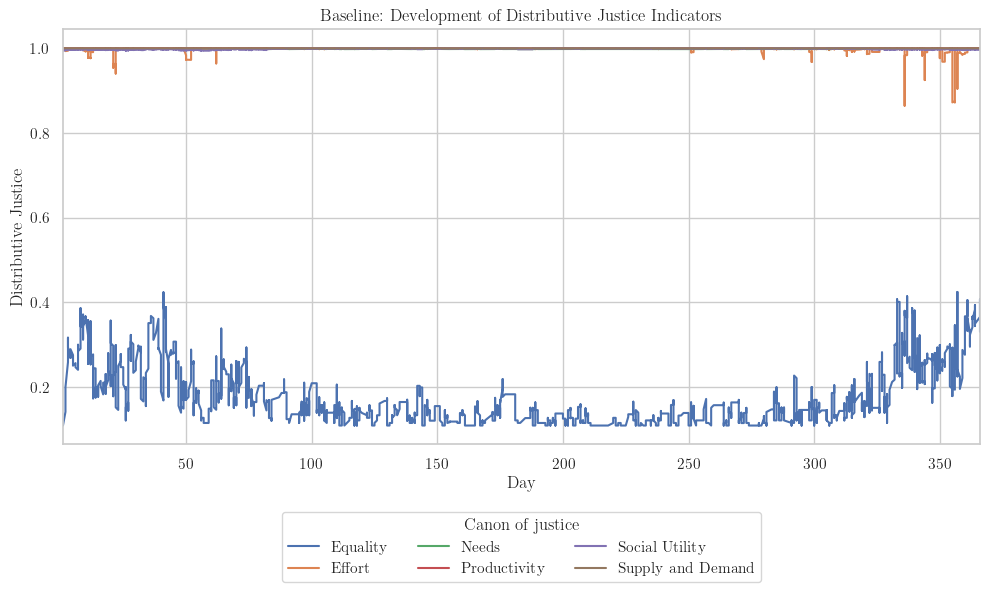

In [142]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 10})
rc('text', usetex=True)
# Define a smoothing function (simple moving average)
# 16, because is the average number of congestions per day
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'equality_level' only for the 'equality' canon
equality_group = bl_tl_results[bl_tl_results['canon'] == 'equality']
smoothed_equality = smooth(equality_group['equality'])
ax.plot(equality_group['day'], smoothed_equality, label='Equality', linestyle='-')

# Plot 'between_share' for all other canons with smoothing
other_groups = bl_tl_results[bl_tl_results['canon'] != 'equality']
labels = ['Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (canon, group) in enumerate(other_groups.groupby('canon')):
    smoothed_within_share = smooth(group['within_share'])
    ax.plot(group['day'], smoothed_within_share, label=labels[i], linestyle='-')

# Add labels and title
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Distributive Justice')
ax.set_title('Baseline: Development of Distributive Justice Indicators')
ax.legend()

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/bl_justice_indicators.eps', dpi=300, format='eps')



Hypothesis why this occurs: During summer, fewer loads need to be dimmed due to PV feed-in. This makes the distribution more equal.

### Euclidean Distance

In [48]:
distance_columns = [
    'effort_distance', 'equality_distance', 'needs_distance',
    'social_utility_distance', 'productivity_distance', 'supply_and_demand_distance'
]
bl_ed_results = pd.DataFrame(columns=distance_columns)

for time in car.index.get_level_values('time').unique():
    car_at_time = car.loc[time]
    
    sod_columns = [
        'sod_effort', 'sod_equality', 'sod_needs',
        'sod_social_utility', 'sod_productivity', 'sod_supply_and_demand'
    ]
    
    vectors = car_at_time[sod_columns].values
    
    share_of_demand = car_at_time['bl_sod'].values
    
    distances = [
        compute_euclidean_distance(vectors[:, i], share_of_demand)
        for i in range(vectors.shape[1])
    ]
    
    bl_ed_results.loc[time] = distances

In [49]:
display(bl_ed_results.head(10))

,effort_distance,equality_distance,needs_distance,social_utility_distance,productivity_distance,supply_and_demand_distance
54.0,10.344080,2.423287,3.610166,3.636986,10.344080,10.344080
56.0,2.810221,2.296100,3.528322,3.591884,10.344080,4.366381
58.0,2.639884,2.208517,3.579382,3.567991,10.344080,4.120334
60.0,2.125308,1.531730,3.205418,3.252584,10.440307,3.364700
70.0,1.404265,1.016161,3.158595,2.979611,10.488088,4.234052
72.0,4.487457,4.284497,4.585985,4.461973,9.798311,4.860480
73.0,1.875693,1.286505,3.398400,3.071854,10.488088,3.654501
87.0,1.572922,1.149085,3.389579,3.087806,10.488088,2.541895
152.0,2.778687,2.353417,3.703570,4.017688,8.113720,4.381614
176.0,2.821904,2.271094,3.577696,3.623714,9.006957,8.558300


In [50]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
bl_ed_results['day'] = (bl_ed_results.index // time_points_per_day) + 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


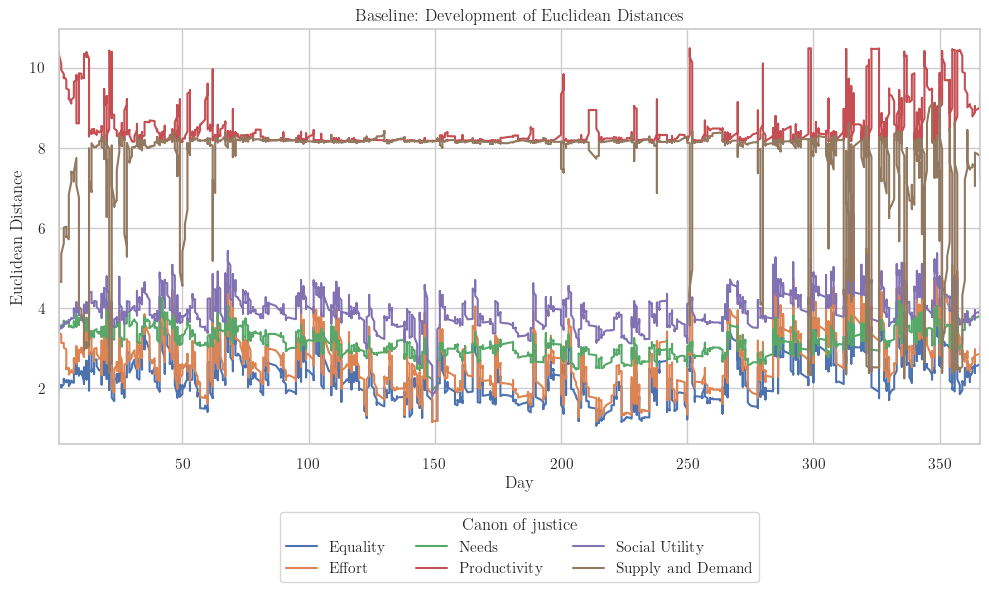

In [66]:
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(10, 6))
distance_columns = [
    'equality_distance', 'effort_distance', 'needs_distance', 'productivity_distance', 'social_utility_distance',  'supply_and_demand_distance'
]
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, col in enumerate(distance_columns):
    smoothed_distance = smooth(bl_ed_results[col])
    plt.plot(bl_ed_results['day'], smoothed_distance, label=labels[i])

# Labeling the plot
plt.title('Baseline: Development of Euclidean Distances')
plt.xlabel('Day')
ax.set_xlim(1, 366)
plt.ylabel('Euclidean Distance')
plt.legend()
plt.grid(True)  

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/bl_euclidean_distance.eps', dpi=300, format='eps')

## Equal weights for each canon

In [73]:
ew_tl_results = []
quantile_columns = ['needs', 'social_utilities', 'effort', 'productivity', 'supply_and_demand']

for time, group in car.groupby(level='time'):
    # share of demand at time step
    full_distribution = group['equal_weights_sod']
    
    # canon of equality
    theils_l_val = compute_theils_l(full_distribution)
    row = {
        'time': time,
        'canon': 'equality',
        'theils_l': theils_l_val
    }
    ew_tl_results.append(row)
    
    # quantiles at time step
    quantiles_per_canon = {}
    for col in quantile_columns:
        quantiles = pd.cut(group[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        group_wise_distributions = [
            group['equal_weights_sod'][quantiles == q].values for q in quantiles.unique()
        ]
        theils_l_within, theils_l_between = theils_l_within_and_between(
            full_distribution, group_wise_distributions
        )
        row = {
            'time': time,
            'canon': col,
            'tl_between': theils_l_between
        }
        for i, group_theils_l in enumerate(theils_l_within):
            row[f'tl_within_Q{i + 1}'] = group_theils_l
        ew_tl_results.append(row)

ew_tl_results = pd.DataFrame(ew_tl_results)

In [74]:
display(ew_tl_results.head(10))

,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4
0,73.0,equality,0.003047,NaN,NaN,NaN,NaN,NaN
1,73.0,needs,NaN,0.001132,0.000820,0.000235,0.000019,0.000840
2,73.0,social_utilities,NaN,0.001008,0.000330,0.001110,0.000499,0.000100
3,73.0,effort,NaN,0.002399,0.000254,0.000045,0.000213,0.000136
4,73.0,productivity,NaN,0.000000,0.003047,NaN,NaN,NaN
5,73.0,supply_and_demand,NaN,0.000000,0.003047,NaN,NaN,NaN
6,87.0,equality,0.002216,NaN,NaN,NaN,NaN,NaN
7,87.0,needs,NaN,0.000672,0.000596,0.000176,0.000028,0.000743
8,87.0,social_utilities,NaN,0.000622,0.000278,0.000959,0.000281,0.000077
9,87.0,effort,NaN,0.000971,0.000328,0.000441,0.000460,0.000017


In [75]:
# clip small values to zero
affected_cols = ['theils_l', 'tl_between', 'tl_within_Q1', 'tl_within_Q2', 'tl_within_Q3', 'tl_within_Q4']
ew_tl_results[affected_cols] = ew_tl_results[affected_cols].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [76]:
# for equality
ew_tl_results['equality'] = ew_tl_results['theils_l'].map(transform_theil_to_atkinson)
# for other canons
for time, group in ew_tl_results.groupby('time'):
    theils_l = group.loc[group['canon'] == 'equality', 'theils_l'].iloc[0]
    #within_share = (theils_l - group.loc[:, 'tl_between']) / theils_l
    within_share = np.where(theils_l > 0,
                            (theils_l - group.loc[:, 'tl_between']) / theils_l,
                            np.nan)
    ew_tl_results.loc[group.index, 'within_share'] = within_share

In [77]:
# clip equality
ew_tl_results[['equality']] = ew_tl_results[['equality']].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [78]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
ew_tl_results['day'] = (ew_tl_results['time'] // time_points_per_day) + 1

Plot with smoothing

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


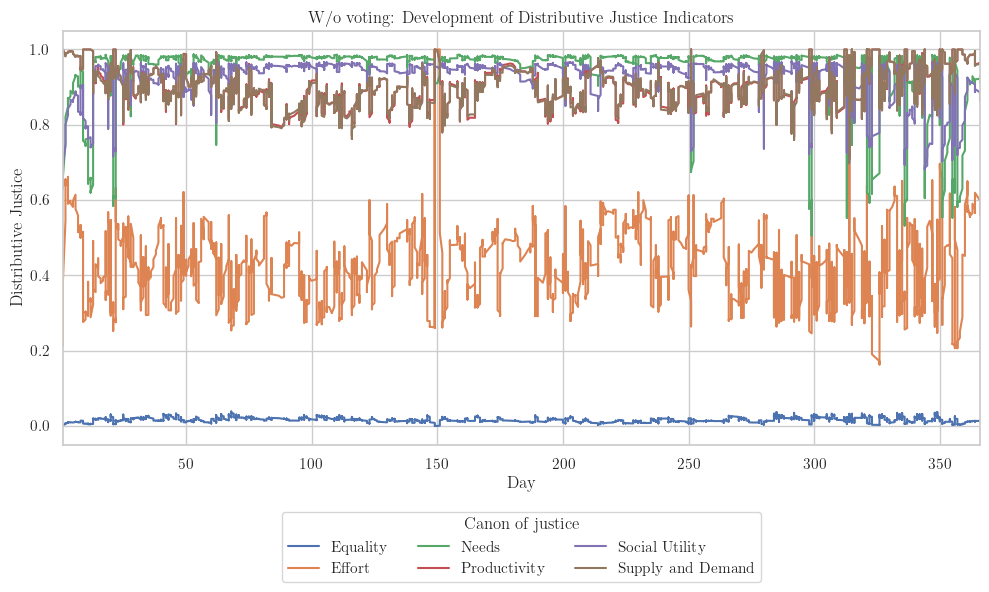

In [79]:

# Define a smoothing function (simple moving average)
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'equality_level' only for the 'equality' canon
equality_group = ew_tl_results[ew_tl_results['canon'] == 'equality']
smoothed_equality = smooth(equality_group['equality'])
ax.plot(equality_group['day'], smoothed_equality, label='Equality', linestyle='-')

# Plot 'between_share' for all other canons with smoothing
other_groups = ew_tl_results[ew_tl_results['canon'] != 'equality']
labels = ['Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (canon, group) in enumerate(other_groups.groupby('canon')):
    smoothed_within_share = smooth(group['within_share'])
    ax.plot(group['day'], smoothed_within_share, label=labels[i], linestyle='-')


# Add labels and title
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Distributive Justice')
ax.set_title('W/o voting: Development of Distributive Justice Indicators')
ax.legend()

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/ew_justice_indicators.eps', dpi=300, format='eps')

In [126]:
outlier_time = 14062
grouped_by_outlier_time = car[car.index.get_level_values('time') == outlier_time]
outlier_mean_values = grouped_by_outlier_time.mean()
print(outlier_mean_values)
theils_l_outlier = ew_tl_results[ew_tl_results['time'] == outlier_time]
display(theils_l_outlier)

demand                   0.001795
contribution             0.005689
allocation               0.001795
exp1_sod                 1.000000
sod_effort               1.000000
sod_equality             1.000000
sod_needs                0.973900
sod_social_utility       0.982106
sod_productivity         0.401338
sod_supply_and_demand    0.402581
needs                    0.449963
social_utilities         0.494130
bl_sod                   0.990991
exp2_sod                 1.000000
equal_weights_sod        1.000000
effort                   1.000000
productivity             6.555848
supply_and_demand        6.555848
dtype: float64


,time,canon,theils_l,tl_between,tl_within_Q1,tl_within_Q2,tl_within_Q3,tl_within_Q4,equality,within_share,day,index
13326,14062.0,equality,-4.440892e-16,NaN,NaN,NaN,NaN,NaN,-4.440892e-16,NaN,147.0,-4.440892e-16
13327,14062.0,needs,NaN,0.0,3.600723e-17,0.0,0.0,0.0,NaN,1.0,147.0,7.657658e-02
13328,14062.0,social_utilities,NaN,0.0,0.000000e+00,0.0,0.0,0.0,NaN,1.0,147.0,1.981982e-01
13329,14062.0,effort,NaN,0.0,0.000000e+00,NaN,NaN,NaN,NaN,1.0,147.0,1.000000e+00
13330,14062.0,productivity,NaN,0.0,0.000000e+00,0.0,0.0,0.0,NaN,1.0,147.0,4.594595e-01
13331,14062.0,supply_and_demand,NaN,0.0,0.000000e+00,0.0,0.0,0.0,NaN,1.0,147.0,4.594595e-01


### Euclidean Distance

In [62]:
distance_columns = [
    'effort_distance', 'equality_distance', 'needs_distance',
    'social_utility_distance', 'productivity_distance', 'supply_and_demand_distance'
]
ew_ed_results = pd.DataFrame(columns=distance_columns)

for time in car.index.get_level_values('time').unique():
    car_at_time = car.loc[time]
    
    sod_columns = [
        'sod_effort', 'sod_equality', 'sod_needs',
        'sod_social_utility', 'sod_productivity', 'sod_supply_and_demand'
    ]
    
    vectors = car_at_time[sod_columns].values
    
    share_of_demand = car_at_time['equal_weights_sod'].values
    
    distances = [
        compute_euclidean_distance(vectors[:, i], share_of_demand)
        for i in range(vectors.shape[1])
    ]
    
    ew_ed_results.loc[time] = distances

In [63]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
ew_ed_results['day'] = (ew_ed_results.index // time_points_per_day) + 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


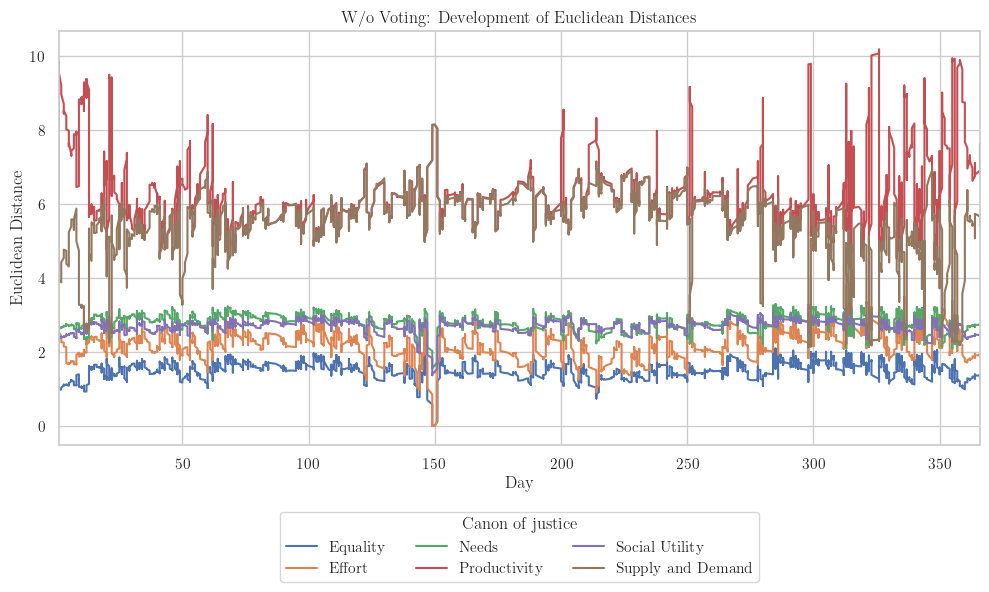

In [73]:
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(10, 6))
distance_columns = [
    'equality_distance', 'effort_distance', 'needs_distance', 'productivity_distance', 'social_utility_distance',  'supply_and_demand_distance'
]
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, col in enumerate(distance_columns):
    smoothed_distance = smooth(ew_ed_results[col])
    plt.plot(ew_ed_results['day'], smoothed_distance, label=labels[i])

# Labeling the plot
plt.title('W/o Voting: Development of Euclidean Distances')
plt.xlabel('Day')
ax.set_xlim(1, 366)
plt.ylabel('Euclidean Distance')
plt.legend()
plt.grid(True)  

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/ew_euclidean_distance.eps', dpi=300, format='eps')

## Comparison between baseline and equal weights

We can conduct the comparison both with regard to Theil's L and Euclidean Distance

### Theil's L

In [80]:
bl_indices = np.where(
    ~bl_tl_results['equality'].isna(),
    bl_tl_results['equality'],
    bl_tl_results['within_share']
)
ew_indices = np.where(
    ~ew_tl_results['equality'].isna(),
    ew_tl_results['equality'],
    ew_tl_results['within_share']
)

In [81]:
bl_ew_ind_comp = pd.DataFrame({
    'time': bl_tl_results['time'],
    'canon': bl_tl_results['canon'],
    'bl_indices': bl_indices,
    'ew_indices': ew_indices,
    'difference': bl_indices - ew_indices
})
display(bl_ew_ind_comp.head(10))

,time,canon,bl_indices,ew_indices,difference
0,73.0,equality,0.109003,0.003042,0.105961
1,73.0,needs,0.999546,0.628477,0.371069
2,73.0,social_utilities,0.994183,0.669127,0.325056
3,73.0,effort,0.998524,0.212692,0.785832
4,73.0,productivity,1.000000,1.000000,0.000000
5,73.0,supply_and_demand,1.000000,1.000000,0.000000
6,87.0,equality,0.109003,0.002213,0.106790
7,87.0,needs,0.999546,0.696482,0.303064
8,87.0,social_utilities,0.994183,0.719464,0.274718
9,87.0,effort,0.998225,0.561810,0.436415


In [82]:
print(compute_descriptive_statistics(bl_ew_ind_comp, 'difference'))

{'mean': 0.17878702540966776, 'std': 0.20999205852343875, '25%': 0.0348346594769367, '50% (median)': 0.0951779169979276, '75%': 0.21033634077358543, 'min': -0.21104707644815868, 'max': 0.994427676244742}


In [83]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
bl_ew_ind_comp['day'] = (bl_ew_ind_comp['time'] // time_points_per_day) + 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


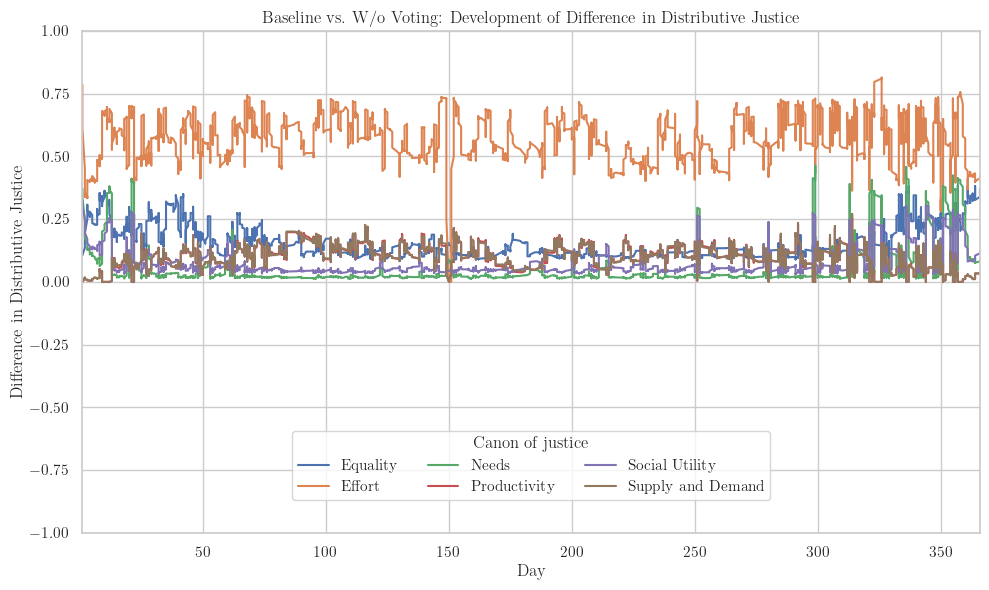

In [84]:
# Define a smoothing function (simple moving average)
def smooth(series, window=20):
    return series.rolling(window, min_periods=1).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

#separate for equality to preserve the order of coloring, legend labels
equality_group = bl_ew_ind_comp[bl_ew_ind_comp['canon'] == 'equality']
equality_smoothed = smooth(equality_group['difference'])
ax.plot(equality_group['day'], equality_smoothed, label='Equality')
other_groups = bl_ew_ind_comp[bl_tl_results['canon'] != 'equality']
labels = ['Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (canon, group) in enumerate(other_groups.groupby('canon')):
    difference = smooth(group['difference'])
    ax.plot(group['day'], difference, label=labels[i], linestyle='-')

# Add labels and title
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Difference in Distributive Justice')
ax.set_title('Baseline vs. W/o Voting: Development of Difference in Distributive Justice')
ax.legend()
ax.set_ylim(-1, 1)
ax.grid(True) 

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.05))

# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/bl_vs_ew_justice_indicators_over_time.eps', dpi=300, format='eps')

### Euclidean Distance

In [75]:
print(bl_ed_results.columns)

Index(['effort_distance', 'equality_distance', 'needs_distance',
       'social_utility_distance', 'productivity_distance',
       'supply_and_demand_distance', 'day'],
      dtype='object')


In [76]:
bl_ew_dist_comp = pd.DataFrame({
    'effort': bl_ed_results['effort_distance'] - ew_ed_results['effort_distance'],
    'equality': bl_ed_results['equality_distance'] - ew_ed_results['equality_distance'],
    'needs': bl_ed_results['needs_distance'] - ew_ed_results['needs_distance'],
    'social_utility': bl_ed_results['social_utility_distance'] - ew_ed_results['social_utility_distance'],
    'productivity': bl_ed_results['productivity_distance'] - ew_ed_results['productivity_distance'],
    'supply_and_demand': bl_ed_results['supply_and_demand_distance'] - ew_ed_results['supply_and_demand_distance'],
})
display(bl_ew_dist_comp.head(10))

,effort,equality,needs,social_utility,productivity,supply_and_demand
54.0,1.472963,1.061055,1.710607,1.853277,1.472963,1.472963
56.0,0.749815,0.999058,0.558392,0.829898,0.386802,0.565892
58.0,0.715470,1.030163,0.657732,0.840710,0.355358,0.530292
60.0,0.417791,0.768134,0.402973,0.631114,0.222662,0.314817
70.0,0.238265,0.429061,0.369586,0.494882,0.209188,0.323927
72.0,2.926042,3.156251,2.347611,2.450076,2.624844,1.735736
73.0,0.176628,0.474430,0.703035,0.806962,0.508188,0.509310
87.0,0.229147,0.452789,0.549567,0.643951,0.342001,0.346604
152.0,1.136542,1.191888,0.951467,1.468025,1.793597,1.058520
176.0,1.178020,0.835079,0.754007,1.119391,1.978237,2.277316


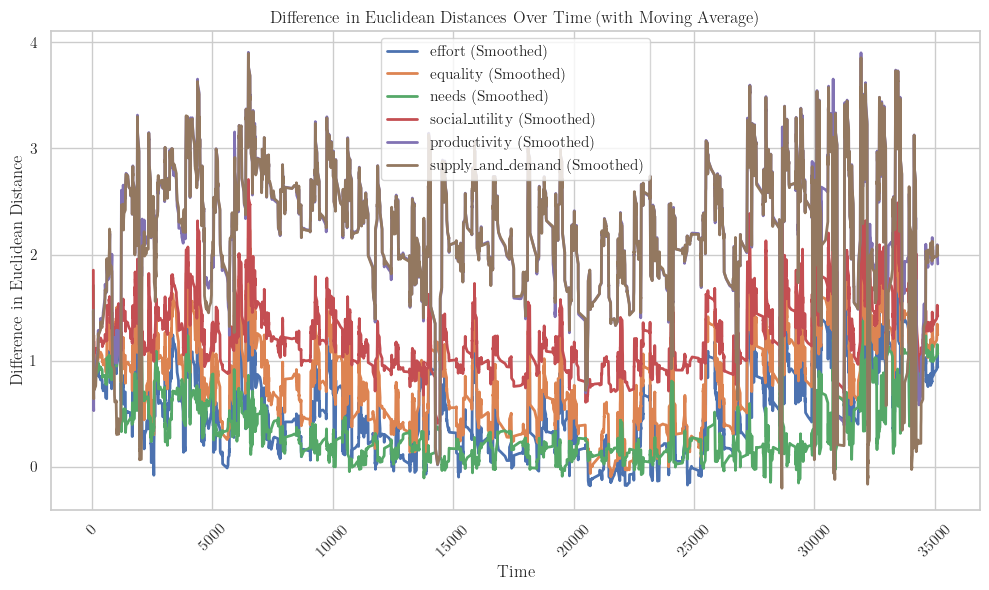

In [77]:
# Assuming result_df has already been created with time as index
# Apply a moving average (rolling window) to smooth the data
window_size = 20  # Define the window size for the moving average

# Create a new DataFrame to store the smoothed distances
smoothed_df = bl_ew_dist_comp.rolling(window=window_size, min_periods=1).mean()

# Plot the original distances
plt.figure(figsize=(10, 6))
for col in bl_ew_dist_comp.columns:
    # Plot the original distances
    #plt.plot(manhattan_distance_df.index, manhattan_distance_df[col], label=f'{col} (Original)', linestyle='--', alpha=0.7)
    # Plot the smoothed distances
    plt.plot(smoothed_df.index, smoothed_df[col], label=f'{col} (Smoothed)', linewidth=2)

# Labeling the plot
plt.title('Difference in Euclidean Distances Over Time (with Moving Average)')
plt.xlabel('Time')
plt.ylabel('Difference in Euclidean Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

This primarily shows differences to the original distribution. It is difficult to interpret with regard to distributive justice. The indices-based approach is more intuitive.

# Justice angles/radars

## Baseline

In [85]:
bl_indices = np.where(
    ~bl_tl_results['equality'].isna(),
    bl_tl_results['equality'],
    bl_tl_results['within_share']
)
bl_tl_results['index'] = bl_indices
bl_canon_index_means = bl_tl_results.groupby('canon').mean()
bl_canon_index_means = bl_canon_index_means['index']
bl_canon_index_std = bl_tl_results.groupby('canon').std()
bl_canon_index_std = bl_canon_index_std['index']
print(bl_canon_index_means)
print(bl_canon_index_std)

canon
effort               0.996475
equality             0.174129
needs                0.998575
productivity         0.999957
social_utilities     0.998551
supply_and_demand    0.999957
Name: index, dtype: float64
canon
effort               0.026217
equality             0.113252
needs                0.000623
productivity         0.000056
social_utilities     0.001777
supply_and_demand    0.000054
Name: index, dtype: float64


In [86]:
# reindex to keep the coloring scheme from above
order = ['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand']
bl_canon_index_means = bl_canon_index_means.reindex(order)
bl_canon_index_std = bl_canon_index_std.reindex(order)
print(bl_canon_index_means)
print(bl_canon_index_std)

canon
equality             0.174129
effort               0.996475
needs                0.998575
productivity         0.999957
social_utilities     0.998551
supply_and_demand    0.999957
Name: index, dtype: float64
canon
equality             0.113252
effort               0.026217
needs                0.000623
productivity         0.000056
social_utilities     0.001777
supply_and_demand    0.000054
Name: index, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_27124\3357289179.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


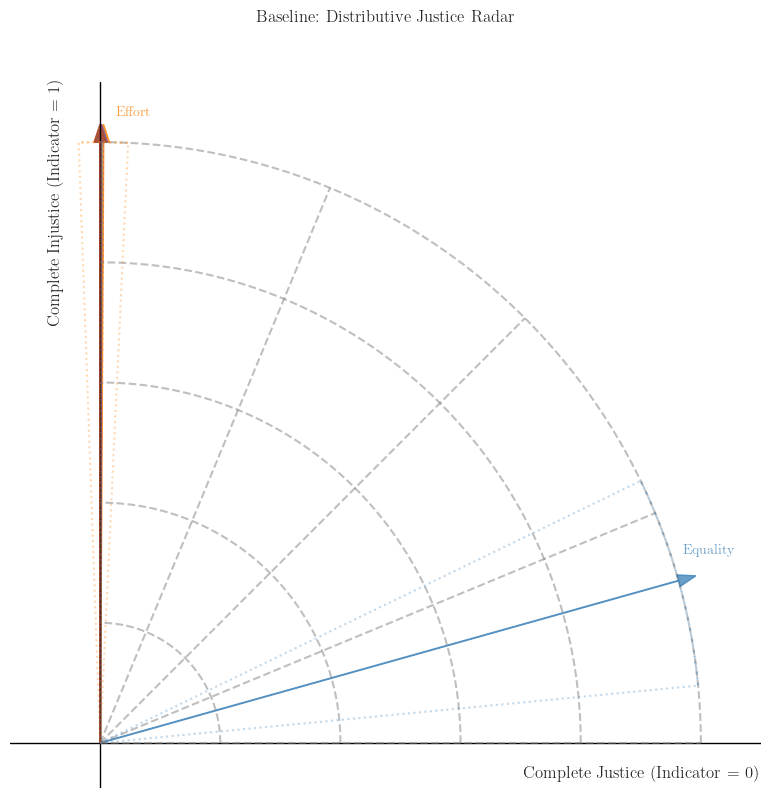

In [88]:
means = bl_canon_index_means
stds = bl_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)


labels = ['Equality', 'Effort', '', '', '', '']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)  
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    arc_x = np.cos(arc_angles)
    arc_y = np.sin(arc_angles)

    cone_x = np.append([0], arc_x) 
    cone_y = np.append([0], arc_y) 
    cone_x2 = np.append(arc_x, 0)
    cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha=0.75
    )
    ax.text(
        x + 0.05, y + 0.05,
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Baseline: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.075, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/bl_justice_radar.eps', dpi=300, format='eps')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\1122551886.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


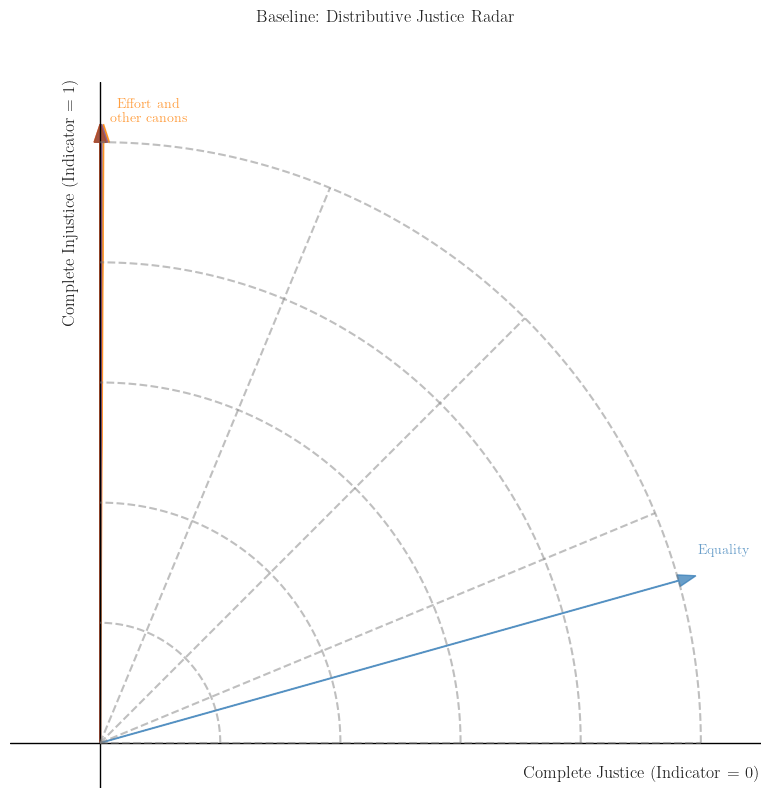

In [89]:
means = bl_canon_index_means
stds = bl_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)


labels = ['Equality', 'Effort and \nother canons', '', '', '', '']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)  
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    arc_x = np.cos(arc_angles)
    arc_y = np.sin(arc_angles)

    cone_x = np.append([0], arc_x) 
    cone_y = np.append([0], arc_y) 
    cone_x2 = np.append(arc_x, 0)
    cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    #ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    #ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha=0.75
    )
    ax.text(
        x + 0.075, y + 0.05,
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Baseline: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/bl_justice_radar_no_std.eps', dpi=300, format='eps')

In [90]:
ew_indices = np.where(
    ~ew_tl_results['equality'].isna(),
    ew_tl_results['equality'],
    ew_tl_results['within_share']
)
ew_tl_results['index'] = ew_indices
ew_canon_index_means = ew_tl_results.groupby('canon').mean()
ew_canon_index_means = ew_canon_index_means['index']
ew_canon_index_std = ew_tl_results.groupby('canon').std()
ew_canon_index_std = ew_canon_index_std['index']
print(ew_canon_index_means)
print(ew_canon_index_std)
order = ['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand']
ew_canon_index_means = ew_canon_index_means.reindex(order)
ew_canon_index_std = ew_canon_index_std.reindex(order)

canon
effort               0.415850
equality             0.017643
needs                0.941868
productivity         0.898332
social_utilities     0.923798
supply_and_demand    0.897280
Name: index, dtype: float64
canon
effort               0.149695
equality             0.010311
needs                0.105402
productivity         0.083811
social_utilities     0.072189
supply_and_demand    0.083213
Name: index, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_27124\47530837.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


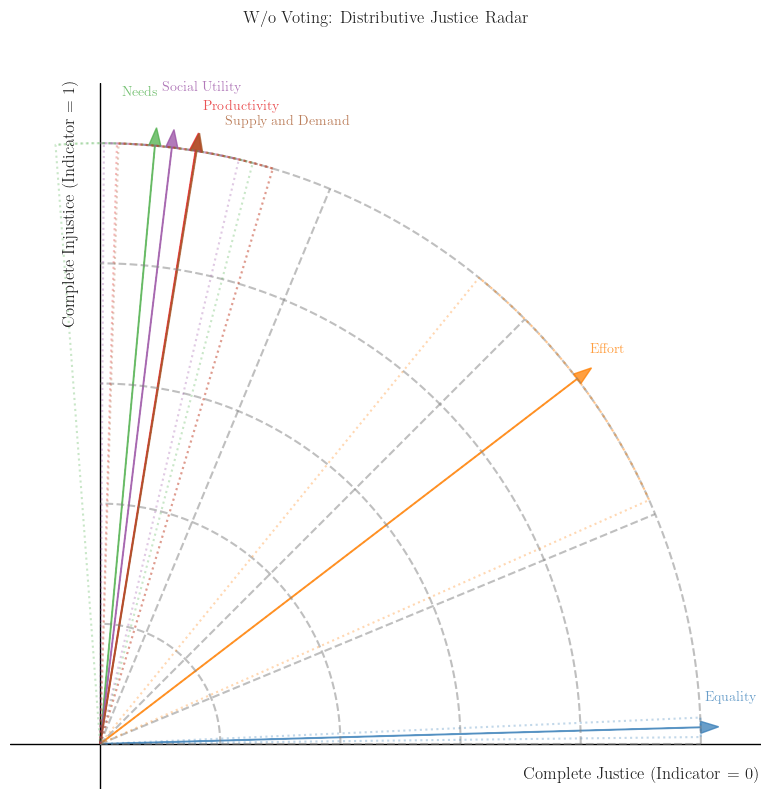

In [91]:
means = ew_canon_index_means
stds = ew_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    arc_x = np.cos(arc_angles)
    arc_y = np.sin(arc_angles)

    cone_x = np.append([0], arc_x) 
    cone_y = np.append([0], arc_y)  
    cone_x2 = np.append(arc_x, 0)
    cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.09,
        3: 0.075,
        4: 0.1,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: -0.025,
        3: 0.075,
        4: 0.05,
        5: 0.15
    }
    ax.text(
        x + text_offset_x[i], y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('W/o Voting: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/ew_justice_radar.eps', dpi=300, format='eps')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\1577069295.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


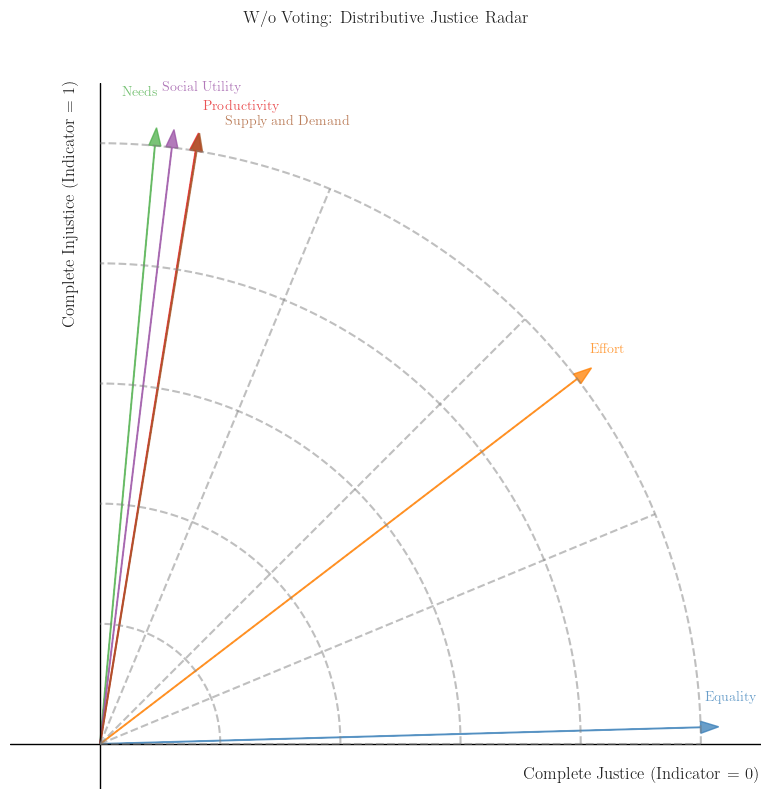

In [92]:
means = ew_canon_index_means
stds = ew_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    #arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    #arc_x = np.cos(arc_angles)
    #arc_y = np.sin(arc_angles)

    #cone_x = np.append([0], arc_x) 
    #cone_y = np.append([0], arc_y)  
    #cone_x2 = np.append(arc_x, 0)
    #cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    #ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    #ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.09,
        3: 0.075,
        4: 0.1,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: -0.025,
        3: 0.075,
        4: 0.05,
        5: 0.15
    }
    ax.text(
        x + text_offset_x[i], y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('W/o Voting: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/ew_justice_radar_no_std.eps', dpi=300, format='eps')

## Descriptive statistics on indicators

In [95]:
bl_tl_results[['index']] = bl_tl_results[['index']].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [96]:
bl_tl_results['canon'] = pd.Categorical(bl_tl_results['canon'], categories=['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand'], ordered=True)

In [97]:
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
bl_dfs = []
for i, (canon, group) in enumerate(bl_tl_results.groupby('canon')):
    desc_stats = compute_descriptive_statistics(group, 'index')
    bl_dfs.append(pd.DataFrame(desc_stats, index=[f'BL {labels[i]}']))
bl_index_df = pd.concat([df for df in bl_dfs]).round(3)
display(bl_index_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\2052114963.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (canon, group) in enumerate(bl_tl_results.groupby('canon')):


,mean,std,25%,50% (median),75%,min,max
BL Equality,0.174,0.113,0.109,0.109,0.206,0.011,0.887
BL Effort,0.996,0.026,0.999,0.999,1.000,0.372,1.000
BL Needs,0.999,0.001,0.998,0.998,0.999,0.994,1.000
BL Productivity,1.000,0.000,1.000,1.000,1.000,0.999,1.000
BL Social Utility,0.999,0.002,0.998,1.000,1.000,0.970,1.000
BL Supply and Demand,1.000,0.000,1.000,1.000,1.000,0.999,1.000


In [98]:
ew_tl_results['canon'] = pd.Categorical(ew_tl_results['canon'], categories=['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand'], ordered=True)
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
ew_dfs = []
for i, (canon, group) in enumerate(ew_tl_results.groupby('canon')):
    desc_stats = compute_descriptive_statistics(group, 'index')
    ew_dfs.append(pd.DataFrame(desc_stats, index=[f'NV {labels[i]}']))
ew_index_df = pd.concat([df for df in ew_dfs]).round(3)
display(ew_index_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\713010426.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (canon, group) in enumerate(ew_tl_results.groupby('canon')):


,mean,std,25%,50% (median),75%,min,max
NV Equality,0.018,0.010,0.009,0.016,0.025,0.000,0.053
NV Effort,0.416,0.150,0.300,0.383,0.503,0.005,1.000
NV Needs,0.942,0.105,0.972,0.980,0.984,0.453,0.995
NV Productivity,0.898,0.084,0.848,0.908,0.965,0.478,1.000
NV Social Utility,0.924,0.072,0.928,0.956,0.963,0.573,0.982
NV Supply and Demand,0.897,0.083,0.847,0.907,0.961,0.429,1.000


In [99]:
index_comparison = pd.concat([bl_index_df, ew_index_df])
index_comparison = index_comparison.applymap(lambda x: f"{x:.3f}".rstrip('0').rstrip('.') if isinstance(x, (int, float)) else x)
display(index_comparison)
index_comparison.to_latex(path + '/analysis/tables/bl_vs_ew_indices.tex')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\718282445.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index_comparison = index_comparison.applymap(lambda x: f"{x:.3f}".rstrip('0').rstrip('.') if isinstance(x, (int, float)) else x)


,mean,std,25%,50% (median),75%,min,max
BL Equality,0.174,0.113,0.109,0.109,0.206,0.011,0.887
BL Effort,0.996,0.026,0.999,0.999,1,0.372,1
BL Needs,0.999,0.001,0.998,0.998,0.999,0.994,1
BL Productivity,1,0,1,1,1,0.999,1
BL Social Utility,0.999,0.002,0.998,1,1,0.97,1
BL Supply and Demand,1,0,1,1,1,0.999,1
NV Equality,0.018,0.01,0.009,0.016,0.025,0,0.053
NV Effort,0.416,0.15,0.3,0.383,0.503,0.005,1
NV Needs,0.942,0.105,0.972,0.98,0.984,0.453,0.995
NV Productivity,0.898,0.084,0.848,0.908,0.965,0.478,1


# Narrow self-interest vs. community-orientation

In [143]:
exp1_tl_results = []
quantile_columns = ['needs', 'social_utilities', 'effort', 'productivity', 'supply_and_demand']

for time, group in car.groupby(level='time'):
    # share of demand at time step
    full_distribution = group['exp1_sod']
    
    # canon of equality
    theils_l_val = compute_theils_l(full_distribution)
    row = {
        'time': time,
        'canon': 'equality',
        'theils_l': theils_l_val
    }
    exp1_tl_results.append(row)
    
    # quantiles at time step
    quantiles_per_canon = {}
    for col in quantile_columns:
        quantiles = pd.cut(group[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        group_wise_distributions = [
            group['exp1_sod'][quantiles == q].values for q in quantiles.unique()
        ]
        theils_l_within, theils_l_between = theils_l_within_and_between(
            full_distribution, group_wise_distributions
        )
        row = {
            'time': time,
            'canon': col,
            'tl_between': theils_l_between
        }
        for i, group_theils_l in enumerate(theils_l_within):
            row[f'tl_within_Q{i + 1}'] = group_theils_l
        exp1_tl_results.append(row)

exp1_tl_results = pd.DataFrame(exp1_tl_results)

In [144]:
# clip small values to zero
affected_cols = ['theils_l', 'tl_between', 'tl_within_Q1', 'tl_within_Q2', 'tl_within_Q3', 'tl_within_Q4']
exp1_tl_results[affected_cols] = exp1_tl_results[affected_cols].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [145]:
# for equality
exp1_tl_results['equality'] = exp1_tl_results['theils_l'].map(transform_theil_to_atkinson)
# for other canons
for time, group in exp1_tl_results.groupby('time'):
    theils_l = group.loc[group['canon'] == 'equality', 'theils_l'].iloc[0]
    #within_share = (theils_l - group.loc[:, 'tl_between']) / theils_l
    within_share = np.where(theils_l > 0,
                            (theils_l - group.loc[:, 'tl_between']) / theils_l,
                            np.nan)
    exp1_tl_results.loc[group.index, 'within_share'] = within_share

In [147]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
exp1_tl_results['day'] = (exp1_tl_results['time'] // time_points_per_day) + 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


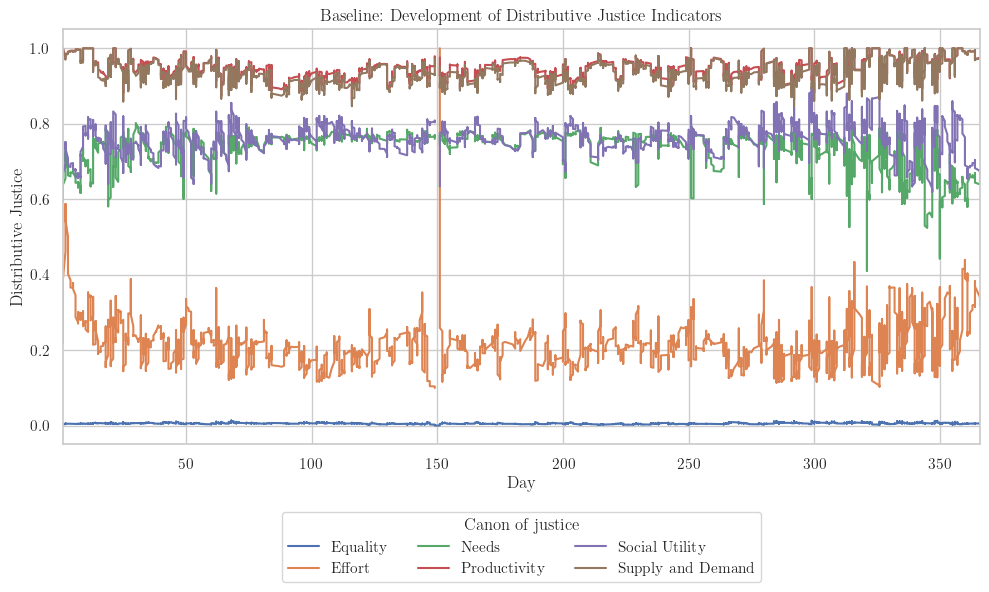

In [148]:
# 16, because is the average number of congestions per day
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'equality_level' only for the 'equality' canon
equality_group = exp1_tl_results[exp1_tl_results['canon'] == 'equality']
smoothed_equality = smooth(equality_group['equality'])
ax.plot(equality_group['day'], smoothed_equality, label='Equality', linestyle='-')

# Plot 'between_share' for all other canons with smoothing
other_groups = exp1_tl_results[exp1_tl_results['canon'] != 'equality']
labels = ['Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (canon, group) in enumerate(other_groups.groupby('canon')):
    smoothed_within_share = smooth(group['within_share'])
    ax.plot(group['day'], smoothed_within_share, label=labels[i], linestyle='-')

# Add labels and title
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Distributive Justice')
ax.set_title('Baseline: Development of Distributive Justice Indicators')
ax.legend()

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/exp1_justice_indicators.eps', dpi=300, format='eps')

In [105]:
exp1_indices = np.where(
    ~exp1_tl_results['equality'].isna(),
    exp1_tl_results['equality'],
    exp1_tl_results['within_share']
)
exp1_tl_results['index'] = exp1_indices
exp1_canon_index_means = exp1_tl_results.groupby('canon').mean()
exp1_canon_index_means = exp1_canon_index_means['index']
exp1_canon_index_std = exp1_tl_results.groupby('canon').std()
exp1_canon_index_std = exp1_canon_index_std['index']
print(exp1_canon_index_means)
print(exp1_canon_index_std)
order = ['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand']
exp1_canon_index_means = exp1_canon_index_means.reindex(order)
exp1_canon_index_std = exp1_canon_index_std.reindex(order)

canon
effort               0.210470
equality             0.006247
needs                0.730706
productivity         0.942793
social_utilities     0.769217
supply_and_demand    0.932572
Name: index, dtype: float64
canon
effort               0.108417
equality             0.003090
needs                0.080122
productivity         0.047657
social_utilities     0.063719
supply_and_demand    0.055422
Name: index, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_27124\3712287976.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


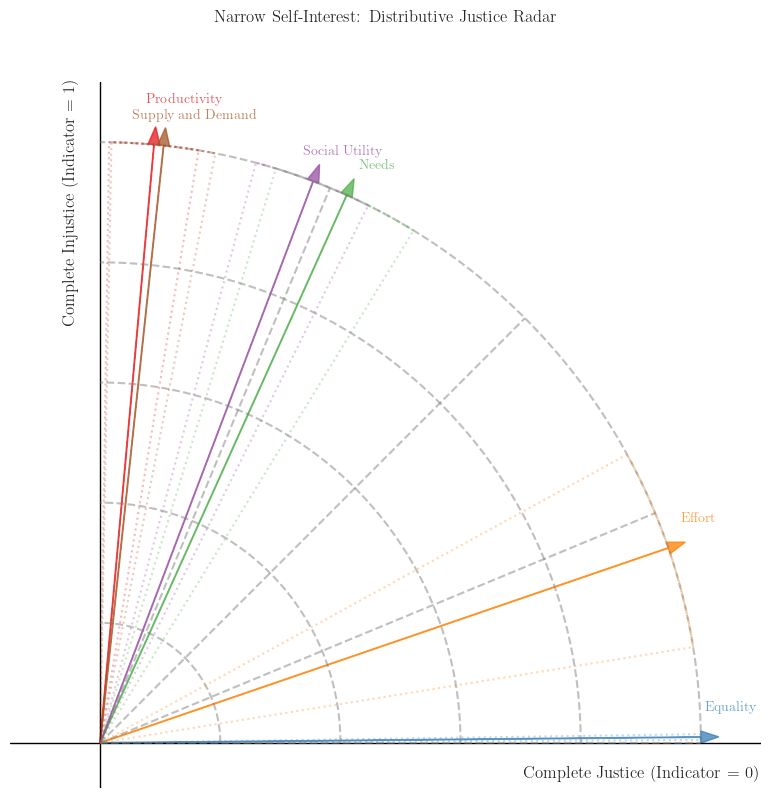

In [118]:
means = exp1_canon_index_means
stds = exp1_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    arc_x = np.cos(arc_angles)
    arc_y = np.sin(arc_angles)

    cone_x = np.append([0], arc_x) 
    cone_y = np.append([0], arc_y)  
    cone_x2 = np.append(arc_x, 0)
    cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.05,
        3: 0.075,
        4: 0.05,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: 0.05,
        3: 0.05,
        4: 0.05,
        5: 0.05
    }
    ax.text(
        x + 0.05, y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Narrow Self-Interest: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/exp1_justice_radar_std.eps', dpi=300, format='eps')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\1980001981.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]


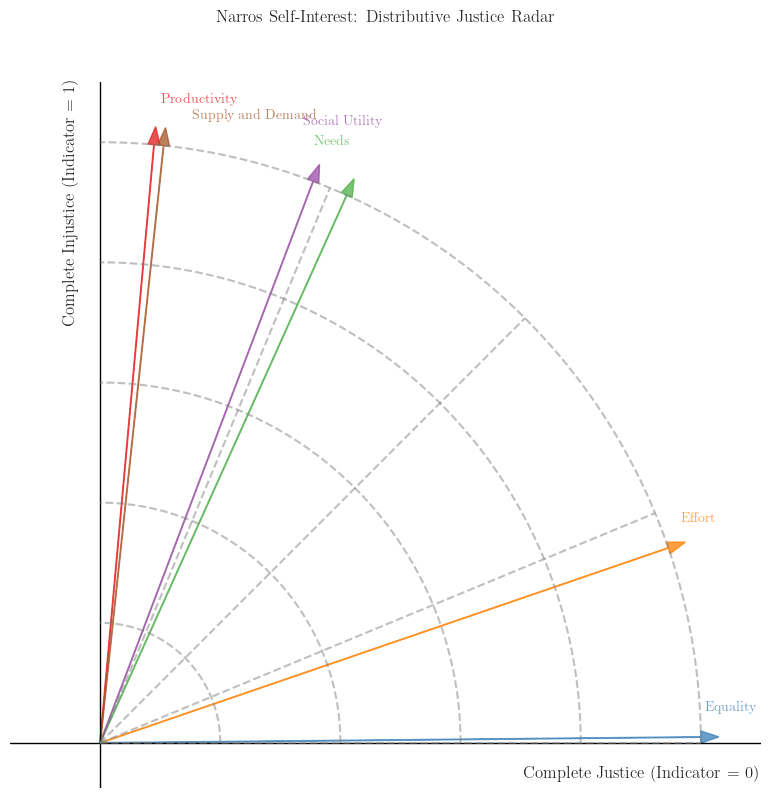

In [108]:
means = exp1_canon_index_means
stds = exp1_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    #arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    #arc_x = np.cos(arc_angles)
    #arc_y = np.sin(arc_angles)

    #cone_x = np.append([0], arc_x) 
    #cone_y = np.append([0], arc_y)  
    #cone_x2 = np.append(arc_x, 0)
    #cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    #ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    #ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.09,
        3: 0.075,
        4: 0.1,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: -0.025,
        3: 0.075,
        4: 0.05,
        5: 0.15
    }
    ax.text(
        x + text_offset_x[i], y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Narrow Self-Interest: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()

In [149]:
exp2_tl_results = []
quantile_columns = ['needs', 'social_utilities', 'effort', 'productivity', 'supply_and_demand']

for time, group in car.groupby(level='time'):
    # share of demand at time step
    full_distribution = group['exp2_sod']
    
    # canon of equality
    theils_l_val = compute_theils_l(full_distribution)
    row = {
        'time': time,
        'canon': 'equality',
        'theils_l': theils_l_val
    }
    exp2_tl_results.append(row)
    
    # quantiles at time step
    quantiles_per_canon = {}
    for col in quantile_columns:
        quantiles = pd.cut(group[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        group_wise_distributions = [
            group['exp2_sod'][quantiles == q].values for q in quantiles.unique()
        ]
        theils_l_within, theils_l_between = theils_l_within_and_between(
            full_distribution, group_wise_distributions
        )
        row = {
            'time': time,
            'canon': col,
            'tl_between': theils_l_between
        }
        for i, group_theils_l in enumerate(theils_l_within):
            row[f'tl_within_Q{i + 1}'] = group_theils_l
        exp2_tl_results.append(row)

exp2_tl_results = pd.DataFrame(exp2_tl_results)

In [150]:
# clip small values to zero
affected_cols = ['theils_l', 'tl_between', 'tl_within_Q1', 'tl_within_Q2', 'tl_within_Q3', 'tl_within_Q4']
exp2_tl_results[affected_cols] = exp2_tl_results[affected_cols].apply(
    lambda x: np.where(np.isnan(x), x, np.maximum(x, 0.0))
)

In [151]:
# for equality
exp2_tl_results['equality'] = exp2_tl_results['theils_l'].map(transform_theil_to_atkinson)
# for other canons
for time, group in exp2_tl_results.groupby('time'):
    theils_l = group.loc[group['canon'] == 'equality', 'theils_l'].iloc[0]
    #within_share = (theils_l - group.loc[:, 'tl_between']) / theils_l
    within_share = np.where(theils_l > 0,
                            (theils_l - group.loc[:, 'tl_between']) / theils_l,
                            np.nan)
    exp2_tl_results.loc[group.index, 'within_share'] = within_share

In [152]:
# add day column
time_points_per_day = 96
time_points_per_hour = 4
exp2_tl_results['day'] = (exp2_tl_results['time'] // time_points_per_day) + 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


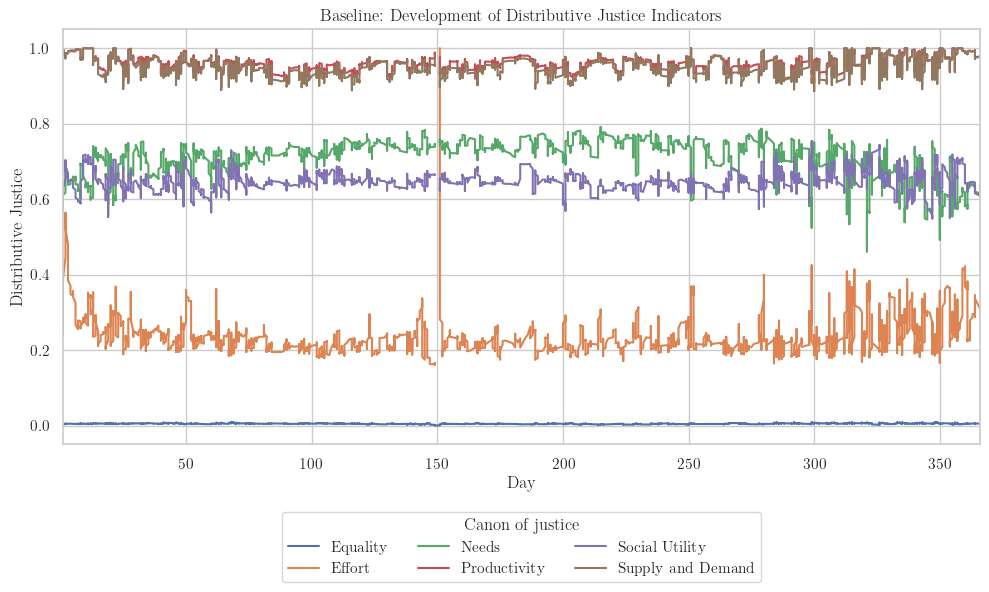

In [153]:
# 16, because is the average number of congestions per day
def smooth(series, window=16):
    return series.rolling(window, min_periods=1).mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'equality_level' only for the 'equality' canon
equality_group = exp2_tl_results[exp2_tl_results['canon'] == 'equality']
smoothed_equality = smooth(equality_group['equality'])
ax.plot(equality_group['day'], smoothed_equality, label='Equality', linestyle='-')

# Plot 'between_share' for all other canons with smoothing
other_groups = exp2_tl_results[exp2_tl_results['canon'] != 'equality']
labels = ['Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (canon, group) in enumerate(other_groups.groupby('canon')):
    smoothed_within_share = smooth(group['within_share'])
    ax.plot(group['day'], smoothed_within_share, label=labels[i], linestyle='-')

# Add labels and title
ax.set_xlabel('Day')
ax.set_xlim(1, 366)
ax.set_ylabel('Distributive Justice')
ax.set_title('Baseline: Development of Distributive Justice Indicators')
ax.legend()

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles, labels, title = 'Canon of justice', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.35))

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
#plt.show()
plt.savefig(path + '/analysis/figures/exp2_justice_indicators.eps', dpi=300, format='eps')

In [113]:
exp2_indices = np.where(
    ~exp2_tl_results['equality'].isna(),
    exp2_tl_results['equality'],
    exp2_tl_results['within_share']
)
exp2_tl_results['index'] = exp2_indices
exp2_canon_index_means = exp2_tl_results.groupby('canon').mean()
exp2_canon_index_means = exp2_canon_index_means['index']
exp2_canon_index_std = exp2_tl_results.groupby('canon').std()
exp2_canon_index_std = exp2_canon_index_std['index']
print(exp2_canon_index_means)
print(exp2_canon_index_std)
order = ['equality', 'effort', 'needs', 'productivity', 'social_utilities', 'supply_and_demand']
exp2_canon_index_means = exp2_canon_index_means.reindex(order)
exp2_canon_index_std = exp2_canon_index_std.reindex(order)

canon
effort               0.234846
equality             0.005272
needs                0.703959
productivity         0.956757
social_utilities     0.651974
supply_and_demand    0.946881
Name: index, dtype: float64
canon
effort               0.089997
equality             0.002077
needs                0.072889
productivity         0.036721
social_utilities     0.050392
supply_and_demand    0.044697
Name: index, dtype: float64


C:\Users\micha\AppData\Local\Temp\ipykernel_27124\469739080.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


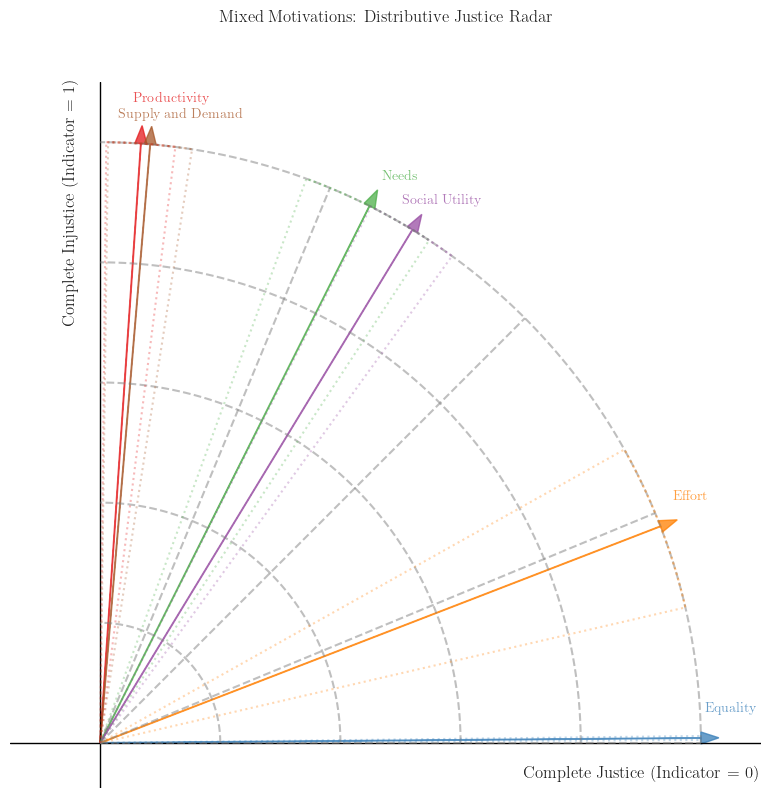

In [121]:
means = exp2_canon_index_means
stds = exp2_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    arc_x = np.cos(arc_angles)
    arc_y = np.sin(arc_angles)

    cone_x = np.append([0], arc_x) 
    cone_y = np.append([0], arc_y)  
    cone_x2 = np.append(arc_x, 0)
    cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.05,
        3: 0.075,
        4: 0.05,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: -0.025,
        3: 0.075,
        4: 0.05,
        5: 0.15
    }
    ax.text(
        x + 0.05, y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Mixed Motivations: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.savefig(path + '/analysis/figures/exp2_justice_radar_std.eps', dpi=300, format='eps')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\1327907165.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  angle = angles[i]


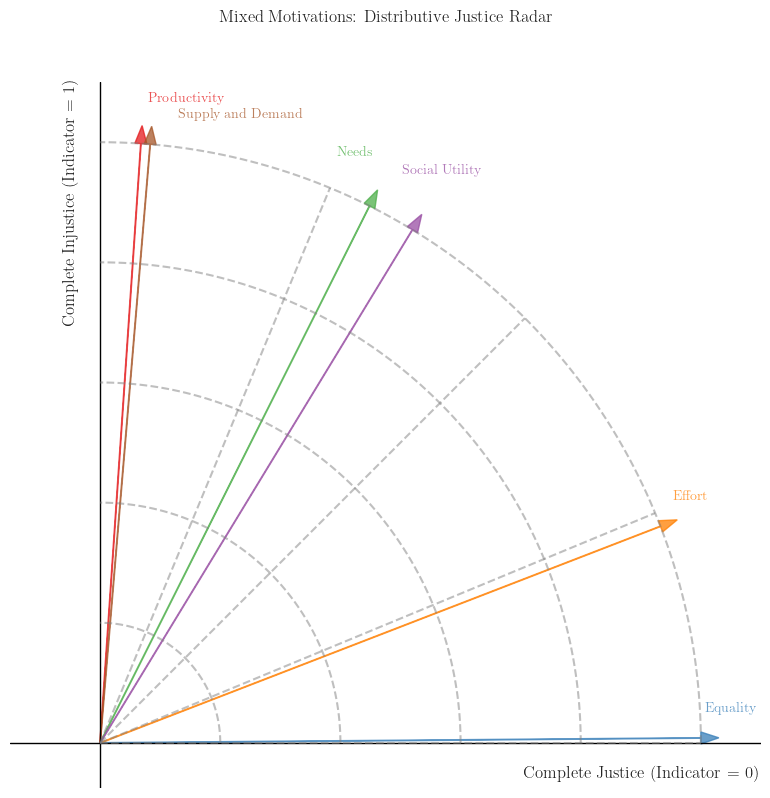

In [115]:
means = exp2_canon_index_means
stds = exp2_canon_index_std

angles = means * (np.pi / 2)

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#a65628']

fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(0, color='black', linewidth=1) 
ax.axvline(0, color='black', linewidth=1)

num_circles = 5
theta = np.linspace(0, np.pi / 2, 100)  # Upper-right quadrant only
for r in np.linspace(0.2, 1.0, num_circles):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)

num_radials = 4
angles2 = np.linspace(0, np.pi / 2, num_radials, endpoint=False)
for angle in angles2:
    x_end = np.cos(angle)
    y_end = np.sin(angle)
    ax.plot([0, x_end], [0, y_end], color='gray', linestyle='--', alpha=0.5)

labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
for i, (label, mean) in enumerate(means.items()):
    angle = angles[i]
    std_angle = stds[label] * (np.pi / 2)
    color = colors[i]

    x = np.cos(angle)
    y = np.sin(angle)

    #arc_angles = np.linspace(angle - std_angle, angle + std_angle, 100)
    #arc_x = np.cos(arc_angles)
    #arc_y = np.sin(arc_angles)

    #cone_x = np.append([0], arc_x) 
    #cone_y = np.append([0], arc_y)  
    #cone_x2 = np.append(arc_x, 0)
    #cone_y2 = np.append(arc_y, 0)
    #ax.fill(cone_x, cone_y, color=color, alpha=0.2, label=label)
    #ax.plot(cone_x, cone_y, color=color, label=label, alpha=0.3, linestyle=':')
    #ax.plot(cone_x2, cone_y2, color=color, alpha=0.3, linestyle=':')

    # Plot the mean vector
    ax.arrow(
        0, 0, x, y,
        head_width=0.02, head_length=0.03, fc=color, ec=color, alpha = 0.75
    )
    text_offset = {
        0: 0.05,
        1: 0.05,
        2: 0.09,
        3: 0.075,
        4: 0.1,
        5: 0.05
    }
    text_offset_x = {
        0: 0.05,
        1: 0.05,
        2: -0.025,
        3: 0.075,
        4: 0.05,
        5: 0.15
    }
    ax.text(
        x + text_offset_x[i], y + text_offset[i],
        labels[i], fontsize=10, ha='center', va='center', color=color, alpha=0.75
    )

# Set equal scaling and limits
ax.set_xlim(-0.15, 1.1)
ax.set_xticks([])
ax.set_ylim(-0.075, 1.1)
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Mixed Motivations: Distributive Justice Radar', y=1.075)

ax.text(0.9, -0.05, 'Complete Justice (Indicator = 0)', fontsize=12, ha='center', va='center', rotation=0)
ax.text(-0.05, 0.9, 'Complete Injustice (Indicator = 1)', fontsize=12, ha='center', va='center', rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.tight_layout()
#plt.show()

In [122]:
exp1_tl_results['canon'] = pd.Categorical(exp1_tl_results['canon'],
                                        categories=['equality', 'effort', 'needs', 'productivity', 'social_utilities',
                                                    'supply_and_demand'], ordered=True)
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
exp1_dfs = []
for i, (canon, group) in enumerate(exp1_tl_results.groupby('canon')):
    desc_stats = compute_descriptive_statistics(group, 'index')
    exp1_dfs.append(pd.DataFrame(desc_stats, index=[f'exp1 {labels[i]}']))
exp1_index_df = pd.concat([df for df in exp1_dfs]).round(3)
display(exp1_index_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\663563917.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (canon, group) in enumerate(exp1_tl_results.groupby('canon')):


,mean,std,25%,50% (median),75%,min,max
exp1 Equality,0.006,0.003,0.004,0.006,0.008,0.000,0.036
exp1 Effort,0.210,0.108,0.138,0.184,0.247,-0.000,1.000
exp1 Needs,0.731,0.080,0.707,0.759,0.779,0.233,0.990
exp1 Productivity,0.943,0.048,0.913,0.949,0.983,0.717,1.000
exp1 Social Utility,0.769,0.064,0.742,0.775,0.808,0.497,0.983
exp1 Supply and Demand,0.933,0.055,0.895,0.938,0.980,0.695,1.000


In [123]:
exp2_tl_results['canon'] = pd.Categorical(exp2_tl_results['canon'],
                                        categories=['equality', 'effort', 'needs', 'productivity', 'social_utilities',
                                                    'supply_and_demand'], ordered=True)
labels = ['Equality', 'Effort', 'Needs', 'Productivity', 'Social Utility', 'Supply and Demand']
exp2_dfs = []
for i, (canon, group) in enumerate(exp2_tl_results.groupby('canon')):
    desc_stats = compute_descriptive_statistics(group, 'index')
    exp2_dfs.append(pd.DataFrame(desc_stats, index=[f'exp2 {labels[i]}']))
exp2_index_df = pd.concat([df for df in exp2_dfs]).round(3)
display(exp2_index_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\4124598764.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (canon, group) in enumerate(exp2_tl_results.groupby('canon')):


,mean,std,25%,50% (median),75%,min,max
exp2 Equality,0.005,0.002,0.004,0.005,0.006,0.000,0.023
exp2 Effort,0.235,0.090,0.184,0.209,0.257,-0.000,1.000
exp2 Needs,0.704,0.073,0.668,0.723,0.754,0.308,0.959
exp2 Productivity,0.957,0.037,0.933,0.962,0.988,0.755,1.000
exp2 Social Utility,0.652,0.050,0.633,0.650,0.675,0.440,0.944
exp2 Supply and Demand,0.947,0.045,0.918,0.953,0.985,0.751,1.000


In [124]:
index_comparison = pd.concat([exp1_index_df, exp2_index_df])
index_comparison = index_comparison.applymap(lambda x: f"{x:.3f}".rstrip('0').rstrip('.') if isinstance(x, (int, float)) else x)
display(index_comparison)
index_comparison.to_latex(path + '/analysis/tables/exp1_vs_exp2_indices.tex')

C:\Users\micha\AppData\Local\Temp\ipykernel_27124\731448576.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index_comparison = index_comparison.applymap(lambda x: f"{x:.3f}".rstrip('0').rstrip('.') if isinstance(x, (int, float)) else x)


,mean,std,25%,50% (median),75%,min,max
exp1 Equality,0.006,0.003,0.004,0.006,0.008,0,0.036
exp1 Effort,0.21,0.108,0.138,0.184,0.247,-0,1
exp1 Needs,0.731,0.08,0.707,0.759,0.779,0.233,0.99
exp1 Productivity,0.943,0.048,0.913,0.949,0.983,0.717,1
exp1 Social Utility,0.769,0.064,0.742,0.775,0.808,0.497,0.983
exp1 Supply and Demand,0.933,0.055,0.895,0.938,0.98,0.695,1
exp2 Equality,0.005,0.002,0.004,0.005,0.006,0,0.023
exp2 Effort,0.235,0.09,0.184,0.209,0.257,-0,1
exp2 Needs,0.704,0.073,0.668,0.723,0.754,0.308,0.959
exp2 Productivity,0.957,0.037,0.933,0.962,0.988,0.755,1


# Canon-specific analysis

In [21]:
# re-import
path = 'C:/Users/micha/Documents/Studium/BA_Oldenburg/Semester_Letztes/BA/ba_krah_michael'
car = pd.read_csv(path + '/results/EXP1_canon_allocation_results.csv', index_col=[0,1])
# import agent data
agent_data = pd.read_csv(path + '/results/EXP1_agent_data.csv', index_col=0)
# merge
car = car.merge(
    agent_data[['household', 'charging_station', 'heatpump', 'PV']],
    left_on='agent', right_index=True,
    how='left'
)

In [22]:
display(car.head())

demand  contribution  allocation  share_of_demand  sod_effort  \
time agent                                                                    
54.0 0      0.001509           0.0    0.001189         0.788001         0.0   
     1      0.000176           0.0    0.000170         0.964418         0.0   
     2      0.009288           0.0    0.008555         0.921041         0.0   
     3      0.000740           0.0    0.000654         0.884232         0.0   
     4      0.001207           0.0    0.000887         0.735132         0.0   

            sod_equality  sod_needs  sod_social_utility  sod_productivity  \
time agent                                                                  
54.0 0          0.829181   0.437207            1.000000               0.0   
     1          0.829181   1.000000            0.944602               0.0   
     2          0.829181   1.000000            0.819844               0.0   
     3          0.829181   0.755237            0.958739               0.0   
     4          0.829181   0.578686            0.706461               0.0   

            sod_supply_and_demand     needs  social_utilities  household  \
time agent                                                                 
54.0 0                        0.0  0.222898          0.664791          0   
     1                        0.0  0.539103          0.552977          1   
     2                        0.0  0.770762          0.479942          1   
     3                        0.0  0.385036          0.561253          1   
     4                        0.0  0.295027          0.413567          0   

            charging_station  heatpump  PV  
time agent                                  
54.0 0                     0         0   1  
     1                     0         0   1  
     2                     0         0   0  
     3                     0         0   1  
     4                     1         0   1

In [23]:
canon_allocations = ['sod_effort', 'sod_equality', 'sod_needs', 'sod_social_utility', 'sod_productivity', 'sod_supply_and_demand']
predictors = ['household', 'charging_station', 'heatpump', 'PV']
results = []
#for outcome in canon_allocations:
#    result = perform_canon_specific_analysis(car, outcome, predictors, path)
#    results.append(result)

Annoyingly, the Maximum Likelihood estimation converges when I run the analyses separately. If I don't, regardless of the canon I use first or second, it will always work for the first canon, but not the second. I will, thus, store the results individually, even though this is a bit tedious.

equality_result = perform_canon_specific_analysis(car, 'sod_equality', predictors, path)
#display(equality_result)

display(equality_result)
equality_result.to_csv(path + '/analysis/equality_result.csv')

effort_result = perform_canon_specific_analysis(car, 'sod_effort', predictors, path)

display(effort_result)

effort_result.to_csv(path + '/analysis/effort_result.csv')

needs_result = perform_canon_specific_analysis(car, 'sod_needs', predictors, path)

needs_result.to_csv(path + '/analysis/needs_result.csv')

social_utility_result = perform_canon_specific_analysis(car, 'sod_social_utility', predictors, path)

social_utility_result.to_csv(path + '/analysis/social_utility_result.csv')

productivity_result = perform_canon_specific_analysis(car, 'sod_productivity', predictors, path)

productivity_result.to_csv(path + '/analysis/productivity_result.csv')

supply_and_demand_result = perform_canon_specific_analysis(car, 'sod_supply_and_demand', predictors, path)

supply_and_demand_result.to_csv(path + '/analysis/supply_and_demand_result.csv')

In [21]:
equality_result = pd.read_csv(path + '/analysis/equality_result.csv', index_col=[0])
effort_result = pd.read_csv(path + '/analysis/effort_result.csv', index_col=[0])
needs_result = pd.read_csv(path + '/analysis/needs_result.csv', index_col=[0])
productivity_result = pd.read_csv(path + '/analysis/productivity_result.csv', index_col=[0])
social_utility_result = pd.read_csv(path + '/analysis/social_utility_result.csv', index_col=[0])
supply_and_demand_result = pd.read_csv(path + '/analysis/supply_and_demand_result.csv', index_col=[0])

In [22]:
canon_regression_results = pd.concat([equality_result, effort_result, needs_result, productivity_result, social_utility_result, supply_and_demand_result], axis=1)

In [23]:
canon_regression_results = canon_regression_results.rename(columns={
    'sod_equality': 'Equality',
    'sod_effort': 'Effort',
    'sod_needs': 'Needs',
    'sod_productivity': 'Productivity',
    'sod_social_utility': 'Social Utility',
    'sod_supply_and_demand': 'Supply and Demand',
})

In [24]:
display(canon_regression_results)

,Equality,Effort,Needs,Productivity,Social Utility,Supply and Demand
Mean,0.7786043930972694,0.7436966040814489,0.8210095014025598,0.3197989173534428,0.7022708698366691,0.4237869390284209
Std.,0.11364731970786812,0.14454932133330756,0.24751317867144418,0.4567472145990392,0.2417222352888151,0.47166377852015395
25%,0.6994997952957617,0.6417736649931358,0.6894606950991713,0.0,0.5317873325934013,0.0031411367879913997
50% (median),0.7804732766364799,0.7453055382929193,0.9776348181736388,0.0,0.7237082305212483,0.0428255418305488
75%,0.8643965291913508,0.8491485361537348,1.0,1.0,0.9210454231351155,1.0
Min,0.4318014255381743,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0
const,"0.031 (0.031, 0.031)","0.322 (0.318, 0.325)","1.67 (1.642, 1.7)","0.074 (0.073, 0.075)","2.145 (2.111, 2.179)","0.08 (0.079, 0.082)"
household,"0.982 (0.979, 0.984)","0.605 (0.6, 0.609)","2.116 (2.089, 2.144)","2.377 (2.344, 2.411)","0.847 (0.837, 0.857)","2.808 (2.769, 2.849)"
charging_station,"0.988 (0.986, 0.991)","0.678 (0.674, 0.683)","1.858 (1.835, 1.881)","1.287 (1.272, 1.303)","0.761 (0.753, 0.77)","1.261 (1.245, 1.276)"


In [25]:
# Access the first six rows, convert to numeric, and round
canon_regression_results.iloc[:6] = canon_regression_results.iloc[:6].apply(pd.to_numeric, errors='coerce').round(3)

# Display the updated DataFrame
display(canon_regression_results)

,Equality,Effort,Needs,Productivity,Social Utility,Supply and Demand
Mean,0.779,0.744,0.821,0.32,0.702,0.424
Std.,0.114,0.145,0.248,0.457,0.242,0.472
25%,0.699,0.642,0.689,0.0,0.532,0.003
50% (median),0.78,0.745,0.978,0.0,0.724,0.043
75%,0.864,0.849,1.0,1.0,0.921,1.0
Min,0.432,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0
const,"0.031 (0.031, 0.031)","0.322 (0.318, 0.325)","1.67 (1.642, 1.7)","0.074 (0.073, 0.075)","2.145 (2.111, 2.179)","0.08 (0.079, 0.082)"
household,"0.982 (0.979, 0.984)","0.605 (0.6, 0.609)","2.116 (2.089, 2.144)","2.377 (2.344, 2.411)","0.847 (0.837, 0.857)","2.808 (2.769, 2.849)"
charging_station,"0.988 (0.986, 0.991)","0.678 (0.674, 0.683)","1.858 (1.835, 1.881)","1.287 (1.272, 1.303)","0.761 (0.753, 0.77)","1.261 (1.245, 1.276)"


In [26]:
canon_regression_results = canon_regression_results.reset_index()
rows_to_remove = ['const', 'lag_outcome', 'precision']
canon_regression_results = canon_regression_results[~canon_regression_results['index'].isin(rows_to_remove)]
canon_regression_results.reset_index(drop=True)
canon_regression_results['index'] = canon_regression_results['index'].replace({
    'household': 'Household OR',
    'charging_station': 'Charging station OR',
    'heatpump': 'Heatpump OR',
    'PV': 'PV plant OR'
})
canon_regression_results.round(3)
display(canon_regression_results)

,index,Equality,Effort,Needs,Productivity,Social Utility,Supply and Demand
0,Mean,0.779,0.744,0.821,0.32,0.702,0.424
1,Std.,0.114,0.145,0.248,0.457,0.242,0.472
2,25%,0.699,0.642,0.689,0.0,0.532,0.003
3,50% (median),0.78,0.745,0.978,0.0,0.724,0.043
4,75%,0.864,0.849,1.0,1.0,0.921,1.0
5,Min,0.432,0.0,0.0,0.0,0.0,0.0
6,Max,1.0,1.0,1.0,1.0,1.0,1.0
8,Household OR,"0.982 (0.979, 0.984)","0.605 (0.6, 0.609)","2.116 (2.089, 2.144)","2.377 (2.344, 2.411)","0.847 (0.837, 0.857)","2.808 (2.769, 2.849)"
9,Charging station OR,"0.988 (0.986, 0.991)","0.678 (0.674, 0.683)","1.858 (1.835, 1.881)","1.287 (1.272, 1.303)","0.761 (0.753, 0.77)","1.261 (1.245, 1.276)"
10,Heatpump OR,"1.0 (0.999, 1.002)","0.909 (0.905, 0.912)","0.98 (0.972, 0.987)","0.957 (0.95, 0.964)","0.99 (0.984, 0.997)","0.932 (0.925, 0.939)"


In [27]:
#canon_regression_results.drop(columns=['level_0'])
canon_regression_results.to_latex(path + '/analysis/tables/canon_regression_results.tex', index=False)